In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import re
import pickle
import matplotlib as mpl

In [2]:
pdm = pd.read_csv("C:/Users/ctata/Documents/Lab/quality_vectors_git/data/dists/tree_pdm_filter.07.csv", index_col = 0)

In [3]:
pdm.shape

(26726, 26726)

## Calculate distances in embedding space

In [4]:
#qdm = pd.read_csv("C:/Users/ctata/Documents/Lab/quality_vectors_git/data/dists/embed_.07_100dim_dists.csv", index_col = 0)

#Faster to recalculate instead of reading in large csv
qual_vec_file = "C:/Users/ctata/Documents/Lab/quality_vectors_git/data/embed/embed_.07_100dim.txt"
qual_vecs = pd.read_csv(qual_vec_file, sep = " ", index_col = 0, dtype = {0:str})
from sklearn.metrics import pairwise_distances
qdm = pairwise_distances(qual_vecs, metric = "cosine")

qdm_pd = pd.DataFrame(qdm)
qdm_pd.columns = qual_vecs.index
qdm_pd.index = qual_vecs.index

## Convert back to full sequences to match

In [5]:
fasta_pdm = pd.read_csv("C:/Users/ctata/Documents/Lab/quality_vectors_git/data/AG_new/filter_.07/seqs_filter.07_otu.fasta", header = None)

headers_pdm = fasta_pdm.iloc[[i for i in range(0, fasta_pdm.shape[0], 2)], :]
seqs_pdm = fasta_pdm.iloc[[i for i in range(1, fasta_pdm.shape[0], 2)], :]
headers_pdm = headers_pdm.values
seqs_pdm = seqs_pdm.values
headers_pdm = [re.sub(">", "", i) for i in headers_pdm.flatten()]
seqs_pdm = seqs_pdm.flatten()

In [6]:
pdm_ord = pdm.loc[headers_pdm, headers_pdm]
pdm_ord.index = seqs_pdm
pdm_ord.columns = seqs_pdm
pdm_ord.iloc[0:5, 0:5]

,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTA,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCG,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGACGCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGTGTCTTGAGTACAGTAGAGGCAGGCG,AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCG,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATGTCTTGAGTGCAGTTGAGGCAGGCG
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTA,0.000000,0.002635,0.002652,0.002336,0.002642
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCG,0.002635,0.000000,0.000238,0.003673,0.000036
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGACGCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGTGTCTTGAGTACAGTAGAGGCAGGCG,0.002652,0.000238,0.000000,0.003690,0.000245
AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCG,0.002336,0.003673,0.003690,0.000000,0.003680
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATGTCTTGAGTGCAGTTGAGGCAGGCG,0.002642,0.000036,0.000245,0.003680,0.000000


In [7]:
fasta_qdm = pd.read_csv("C:/Users/ctata/Documents/Lab/quality_vectors_git/data/embed/seqs_.07_embed.fasta", header = None)
headers_qdm = fasta_qdm.iloc[[i for i in range(0, fasta_qdm.shape[0], 2)], :]
seqs_qdm = fasta_qdm.iloc[[i for i in range(1, fasta_qdm.shape[0], 2)], :]
headers_qdm = headers_qdm.values
seqs_qdm = seqs_qdm.values
headers_qdm = [re.sub(">", "", i) for i in headers_qdm.flatten()]
seqs_qdm = seqs_qdm.flatten()

In [8]:
qdm_ord = qdm_pd.loc[headers_qdm, headers_qdm]
qdm_ord.index = seqs_qdm
qdm_ord.columns = seqs_qdm

In [9]:
qdm_ord = qdm_ord.iloc[0:-1, 0:-1]
print(qdm_ord.shape)

(26726, 26726)


In [10]:
#We don't want to count self-comparisons
#for i in range(pdm_ord.shape[0]):
#    qdm_ord.iloc[i,i] = None
#    pdm_ord.iloc[i,i] = None

## Sort to make sure all sequences are matching

In [11]:
pdm_row = pdm_ord.sort_index(axis = 0)
pdm_both = pdm_row.sort_index(axis = 1)

In [12]:
qdm_row = qdm_ord.sort_index(axis = 0)
qdm_both = qdm_row.sort_index(axis = 1)

In [13]:
#Indexes should match
np.sum([i == j for i,j in zip(qdm_both.index.values, pdm_both.index.values)])

26726

## Mantel test to compare the two distance matrices

In [19]:
from skbio.stats.distance import mantel

In [43]:
man_coeff, man_pval, _ = mantel(qdm_both, pdm_both)
print(man_coeff)
print(man_pval)

0.12259704495321906
0.001


## Create matrix for contour map

In [25]:
ranges = range(26)
bin_size = 100
z = np.zeros((bin_size+1, bin_size+1))
for r in ranges:
    i = 1000
    print(r)
    qdm_small = qdm_both.iloc[r*i : (r+1)*i, :]
    pdm_small = pdm_both.iloc[r*i : (r+1)*i, :]
    
    x_small = np.max(np.max(qdm_small))
    y_small = np.max(np.max(pdm_small))

    bins_x = np.linspace(0, x_small, bin_size)
    bins_y = np.linspace(0, y_small, bin_size)
    x = np.digitize(qdm_small, bins_x)
    y = np.digitize(pdm_small, bins_y)

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[y[i,j], x[i,j]] += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [28]:
f = open("C:/Users/ctata/Documents/Lab/quality_vectors_git/data/dists/contour_map_mat2.obj", "wb")
pickle.dump(z, f)
f.close()

In [29]:

def plotLegend(scale, ax, cmap):
    norm = mpl.colors.Normalize(vmin=min(scale), vmax=max(scale))
    cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm = norm,
                                    orientation='vertical')

## Plot contour map

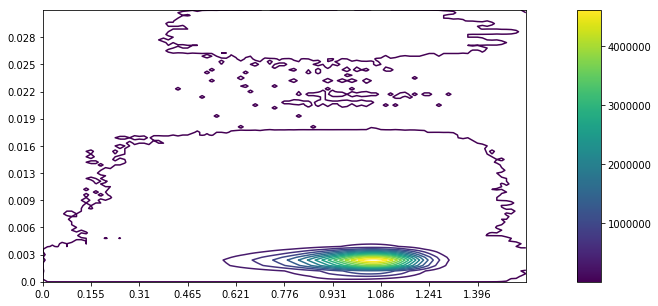

In [30]:
max_val = np.max(z)
scale = np.arange(1, max_val, max_val / 15)
cmap = 'viridis'
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), gridspec_kw = {'width_ratios':[20, 1]})
ax1.contour(z, levels = scale, cmap =  cmap)
x_range = range(len(bins_x))
y_range = range(len(bins_y))
ax1.set_xticks(x_range[0::10])
ax1.set_yticks(y_range[0::10])
ax1.set_yticklabels([round(i, 3) for i in bins_y[0::10]])
ax1.set_xticklabels([round(i, 3) for i in bins_x[0::10]])
plotLegend(scale, ax2, cmap)

## Correlation test

In [44]:
i = 1000
pdm_vec = pdm_both.iloc[0:i, 0:i].values.flatten()
qdm_vec = qdm_both.iloc[0:i, 0:i].values.flatten()
spearmanr(pdm_vec, qdm_vec, nan_policy = "omit")

SpearmanrResult(correlation=0.3257246319149399, pvalue=0.0)

## CCA using phylogenetic and embedding distances